In [1]:
from tensorflow.keras import datasets, utils, models, layers, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocessing
X_train = train_images.reshape(60000, 784)
X_test = test_images.reshape(10000, 784)

# Normalizing (0-1)
X_train = X_train.astype('float32') / 255
X_test =  X_test.astype('float32') / 255

Y_train = utils.to_categorical(train_labels)
Y_test = utils.to_categorical(test_labels)

print(train_labels[0])
print(Y_train[0])

11493376/11490434 [==============================] - 0s 0us/step
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


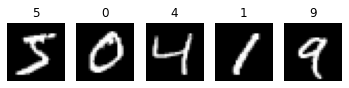

In [3]:
# Visualize Sample Training Data
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')

## Model Creation

In [6]:
myModel = models.Sequential()
myModel.add(layers.Dense(500, activation='relu', input_shape=(784,)))
myModel.add(layers.Dropout(0.2))
myModel.add(layers.Dense(100, activation='relu'))
myModel.add(layers.Dropout(0.2))
myModel.add(layers.Dense(10, activation='softmax'))

myModel.summary()
myModel.compile(optimizer=optimizers.SGD(lr=0.01), loss=losses.categorical_crossentropy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Train and Evaluation

In [7]:
history = myModel.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 3s 8ms/step - loss: 1.3511 - val_loss: 0.6293
Epoch 2/50
375/375 [==============================] - 3s 8ms/step - loss: 0.6481 - val_loss: 0.4165
Epoch 3/50
375/375 [==============================] - 3s 8ms/step - loss: 0.5042 - val_loss: 0.3472
Epoch 4/50
375/375 [==============================] - 3s 8ms/step - loss: 0.4385 - val_loss: 0.3116
Epoch 5/50
375/375 [==============================] - 3s 8ms/step - loss: 0.3967 - val_loss: 0.2872
Epoch 6/50
375/375 [==============================] - 3s 8ms/step - loss: 0.3663 - val_loss: 0.2686
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3419 - val_loss: 0.2533
Epoch 8/50
375/375 [==============================] - 3s 8ms/step - loss: 0.3236 - val_loss: 0.2421
Epoch 9/50
375/375 [==============================] - 3s 8ms/step - loss: 0.3085 - val_loss: 0.2308
Epoch 10/50
375/375 [==============================] - 3s 8ms/step - loss: 0.2947 - val_loss: 0.2205

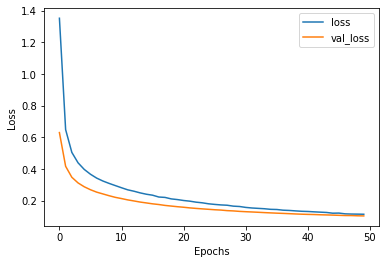

In [8]:
# Plot Losses
losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

313/313 [==============================] - 1s 2ms/step - loss: 0.0981
test loss:  0.09806519001722336


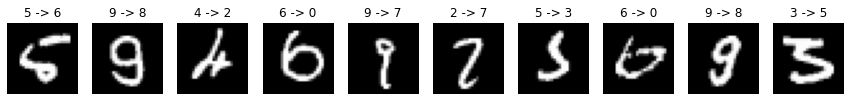

In [9]:
# Evaluation on Test Data
test_loss = myModel.evaluate(X_test, Y_test)
print("test loss: ", test_loss)

test_labels_p = myModel.predict(X_test)
test_labels_p = np.argmax(test_labels_p, axis=1)

n = 0
f, axs = plt.subplots(1,10,figsize=(15,15))
for i in range(len(test_labels)):
    if n >= 10:
      break
    if (test_labels_p[i] != test_labels[i]):
      axs[n].imshow(test_images[i], cmap='gray')
      axs[n].set_title(f'{test_labels[i]} -> {test_labels_p[i]}')
      axs[n].axis('off')
      n = n+1